<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/Sample_Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing PyCaret**

PyCaret is an open-source, low-code machine learning library in Python designed to make the end-to-end machine learning process easier and faster for both beginners and experienced data scientists. It offers a variety of tools and functions for data preparation, model training, model selection, and deployment.

In [54]:
#if Google Colab is used, a restart might be required after installing PyCaret
!pip install pycaret

  Using cached matplotlib-3.7.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.7 kB)
Using cached matplotlib-3.7.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
colourmap 1.1.18 requires matplotlib>=3.10, but you have matplotlib 3.7.5 which is incompatible.
pca 2.0.8 requires matplotlib>=3.10, but you have matplotlib 3.7.5 which is incompatible.
plotnine 0.14.3 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.
plotnine 0.14.3 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.


In [1]:
#checking the version installed
from pycaret.utils import version
version()

'3.3.2'

**Install Analysis Extras for Explainable AI**

In [2]:
!pip install pycaret[analysis]

## Exploratory analysis and scaling
In order to have a clean dataset, a few criteria need to be checked. Also, scaling is needed for PCA

**Import Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.1.4
Seaborn version:  0.13.2


**Reading the dataset**


In [5]:
#read csv file into dataframe
df = pd.read_csv('Climatic_Zones.csv')
df.head(10)

T     H    CO2      V    WS      SR  CZ
0  14.4  89.5  399.7  0.594  1.10  286.04   1
1  16.8  74.3  395.0  0.585  1.53  397.03   1
2  15.3  88.3  398.3  0.572  1.23  351.44   1
3  17.3  81.6  407.1  0.430  1.78  397.16   1
4  18.9  84.6  412.8  0.503  2.49  431.06   1
5  24.2  79.7  405.7  0.400  2.03  520.08   1
6  18.4  89.6  401.0  0.506  2.34  379.26   1
7  12.1  94.7  415.0  0.628  0.82  237.31   1
8  25.7  81.0  396.9  0.458  2.15  550.82   0
9  15.8  91.4  410.3  0.599  1.99  331.91   1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1000 non-null   float64
 1   H       1000 non-null   float64
 2   CO2     1000 non-null   float64
 3   V       1000 non-null   float64
 4   WS      1000 non-null   float64
 5   SR      1000 non-null   float64
 6   CZ      1000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 54.8 KB


In [7]:
print("Number of duplicated rows is: ", df  .duplicated().sum())

Number of duplicated rows is:  0


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

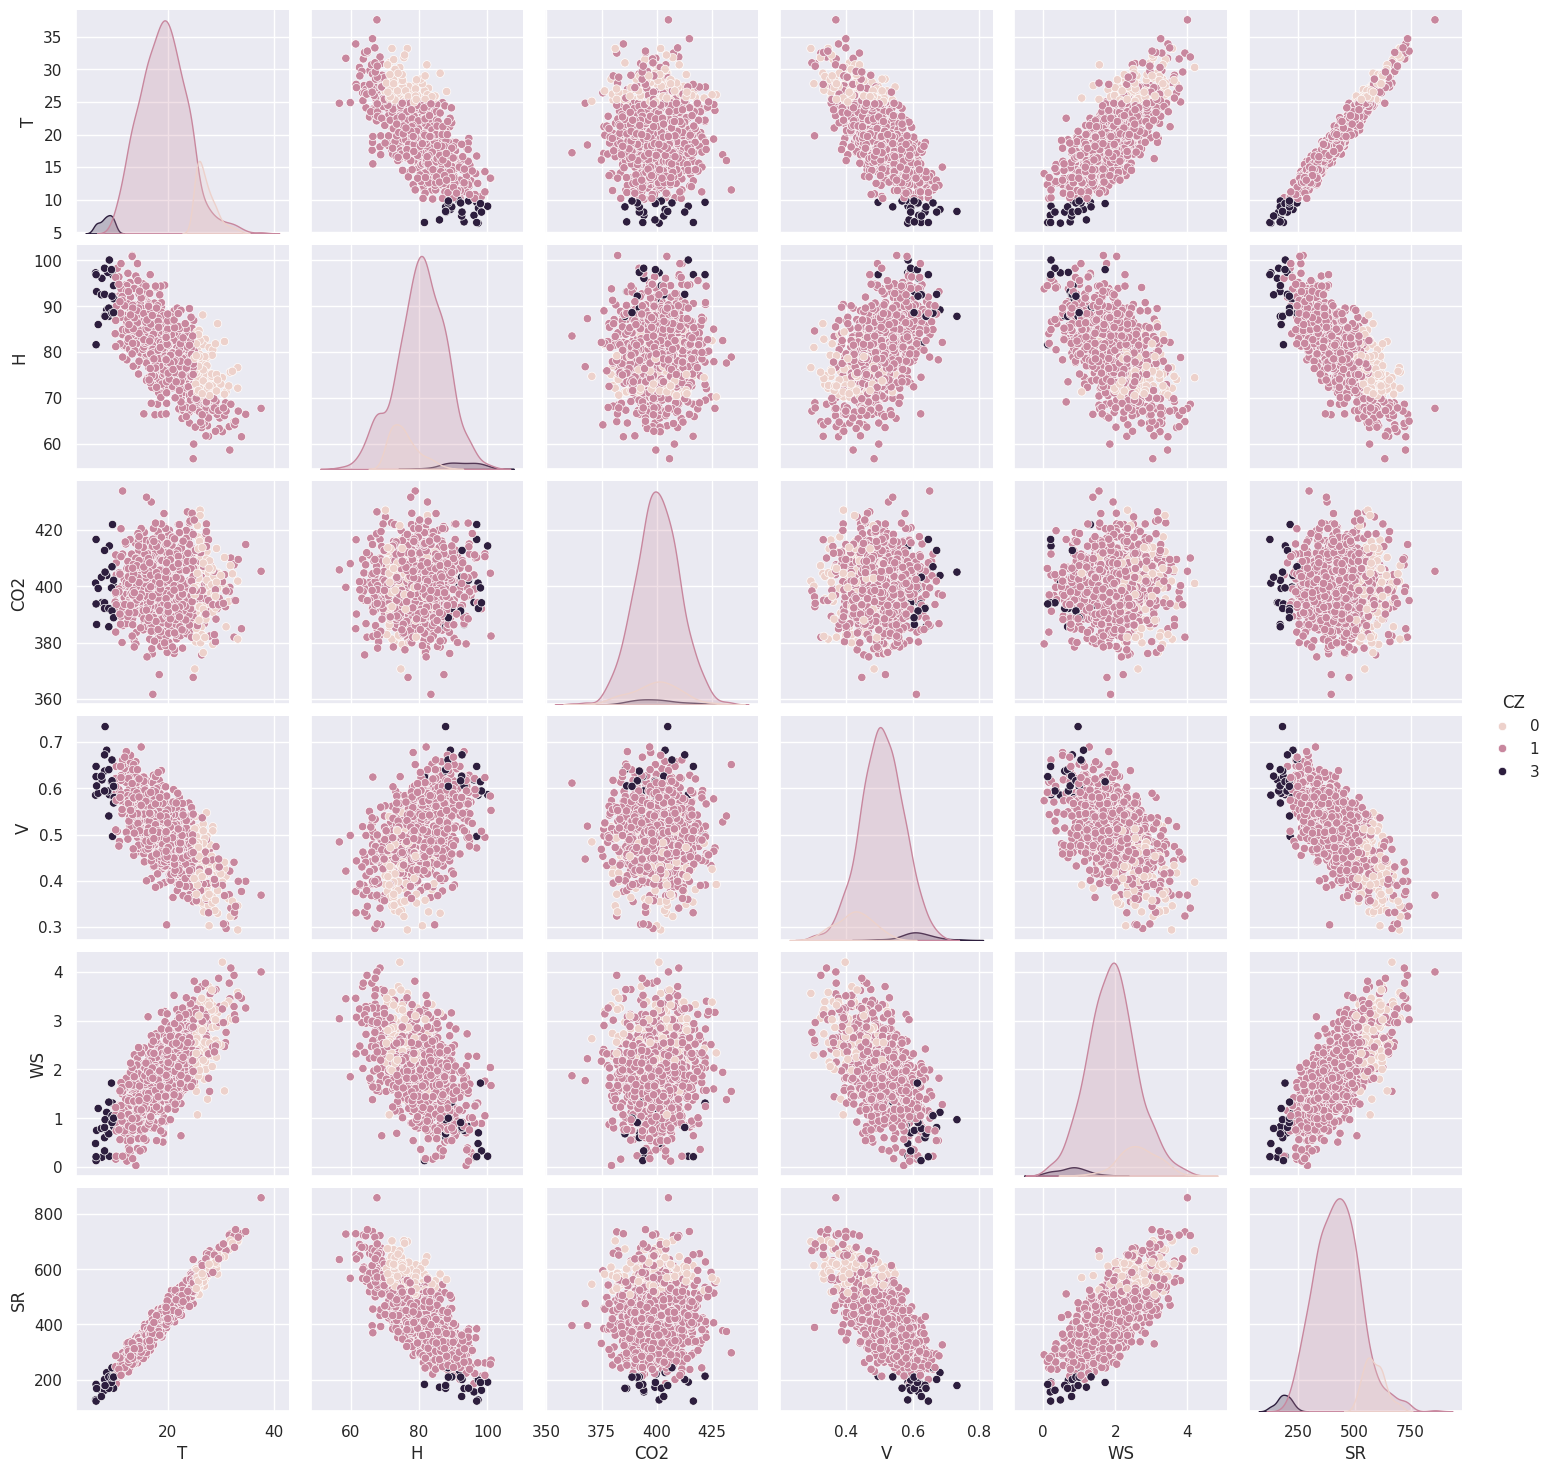

In [9]:
sns.pairplot(df, hue='CZ')
plt.show()

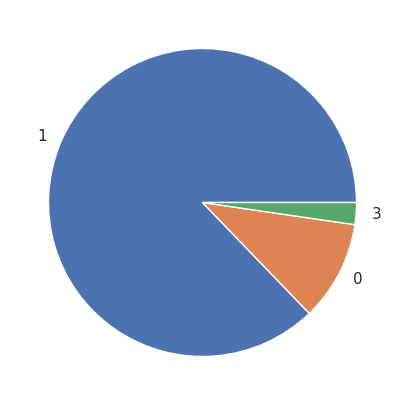

In [10]:
y =df['CZ']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Scaling Data Matrix**

In [11]:
X = df.drop(columns=['CZ'])
X.head(10)

T     H    CO2      V    WS      SR
0  14.4  89.5  399.7  0.594  1.10  286.04
1  16.8  74.3  395.0  0.585  1.53  397.03
2  15.3  88.3  398.3  0.572  1.23  351.44
3  17.3  81.6  407.1  0.430  1.78  397.16
4  18.9  84.6  412.8  0.503  2.49  431.06
5  24.2  79.7  405.7  0.400  2.03  520.08
6  18.4  89.6  401.0  0.506  2.34  379.26
7  12.1  94.7  415.0  0.628  0.82  237.31
8  25.7  81.0  396.9  0.458  2.15  550.82
9  15.8  91.4  410.3  0.599  1.99  331.91

In [12]:
X.describe().transpose()

count        mean         std      min       25%      50%       75%  \
T    1000.0   19.860600    5.124610    6.400   16.2000   19.700   23.5000   
H    1000.0   80.238200    7.316458   56.700   75.2000   80.350   85.3000   
CO2  1000.0  400.183700   10.117487  361.600  393.6000  400.200  406.8000   
V    1000.0    0.500793    0.070381    0.294    0.4540    0.501    0.5470   
WS   1000.0    1.967160    0.720116    0.030    1.4800    1.970    2.4300   
SR   1000.0  436.486730  113.671174  122.970  356.2925  434.110  514.9675   

         max  
T     37.600  
H    101.100  
CO2  433.800  
V      0.733  
WS     4.200  
SR   858.220

** Standardizing the Data**

In [13]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

T         H       CO2         V        WS        SR
0 -1.066097  1.266519 -0.047832  1.324975 -1.204798 -1.324188
1 -0.597535 -0.812028 -0.512607  1.197036 -0.607373 -0.347287
2 -0.890386  1.102423 -0.186276  1.012236 -1.024181 -0.748556
3 -0.499917  0.186221  0.683941 -1.006351 -0.260033 -0.346142
4 -0.187542  0.596461  1.247604  0.031373  0.726413 -0.047764
5  0.847200 -0.073597  0.545497 -1.432813  0.087307  0.735763
6 -0.285159  1.280194  0.080722  0.074020  0.518009 -0.503693
7 -1.515136  1.977601  1.465158  1.808298 -1.593819 -1.753095
8  1.140052  0.104174 -0.324719 -0.608320  0.254031  1.006328
9 -0.792769  1.526338  1.000383  1.396052  0.031733 -0.920454

In [14]:
X.describe().transpose()

count          mean     std       min       25%       50%       75%  \
T    1000.0  3.677059e-16  1.0005 -2.627973 -0.714675 -0.031355  0.710536   
H    1000.0 -8.757439e-16  1.0005 -3.218768 -0.688956  0.015288  0.692184   
CO2  1000.0  1.307399e-15  1.0005 -3.815474 -0.651050  0.001612  0.654274   
V    1000.0 -5.764278e-16  1.0005 -2.939645 -0.665181  0.002943  0.656851   
WS   1000.0  2.735590e-16  1.0005 -2.691414 -0.676841  0.003946  0.643052   
SR   1000.0 -1.918465e-16  1.0005 -2.759482 -0.705846 -0.020919  0.690765   

          max  
T    3.463342  
H    2.852779  
CO2  3.324256  
V    3.300915  
WS   3.102220  
SR   3.711973

**Observations and variables**

In [15]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

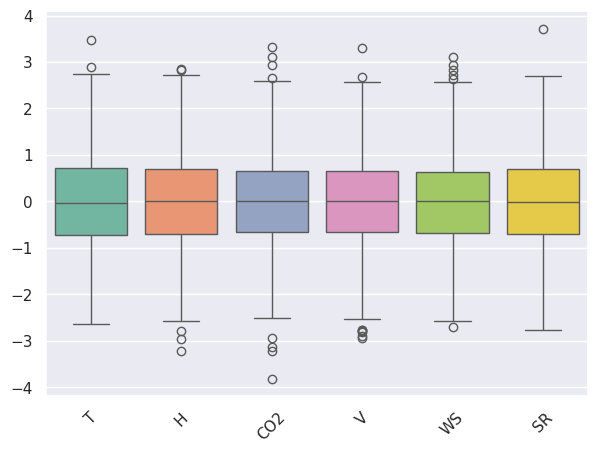

In [16]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

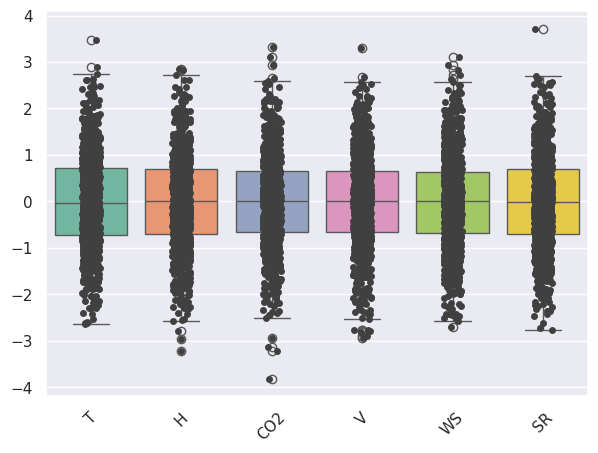

In [17]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

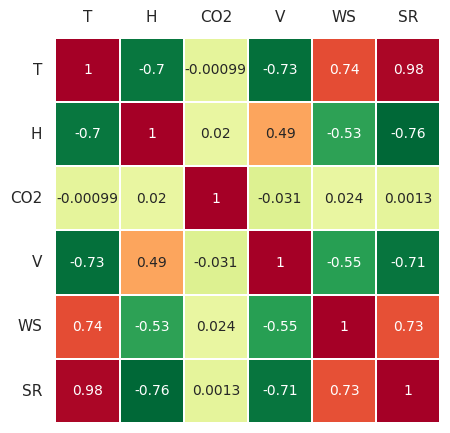

In [18]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.1, annot=True, cbar=False, square=True, annot_kws={"size": 10})
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);


##**Applying PCA**

In [19]:
!pip install pca

  Using cached matplotlib-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached matplotlib-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    Uninstalling matplotlib-3.7.5:
      Successfully uninstalled matplotlib-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.3 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
pycaret 3.3.2 requires matplotlib<3.8.0, but you have matplotlib 3.10.0 which is incompatible.
ydata-profiling 4.12.1 requires matplotlib<3.10,>=3.5, but you have matplotlib 3.10.0 which is incompatible.


In [20]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA and keep all components
pca_model = PCA(n_components=X.shape[1])
pca_model.fit(X_scaled)

# Extract eigenvalues and eigenvectors
eigenvalues = pca_model.explained_variance_
eigenvectors = pca_model.components_

# Create a DataFrame for better visualization
eigenvector_df = pd.DataFrame(
    eigenvectors,
    columns=X.columns,
    index=[f"Principal Component {i+1}" for i in range(eigenvectors.shape[0])]
)

# Display results
print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvector_df)

Eigenvalues:
[3.80479592 1.00427441 0.51039753 0.43938228 0.23001081 0.01714506]

Eigenvectors:
                              T         H       CO2         V        WS  \
Principal Component 1  0.493315 -0.409715  0.005385 -0.408563  0.418895   
Principal Component 2  0.011793 -0.057501 -0.996690  0.046539 -0.028376   
Principal Component 3 -0.034037 -0.737301  0.077570  0.651072 -0.138932   
Principal Component 4 -0.004366 -0.289573  0.016519 -0.507023 -0.811014   
Principal Component 5  0.536965  0.440096  0.016477  0.386737 -0.382753   
Principal Component 6  0.683368 -0.087623  0.004334  0.019439 -0.013254   

                             SR  
Principal Component 1  0.496334  
Principal Component 2  0.013885  
Principal Component 3  0.077552  
Principal Component 4  0.032240  
Principal Component 5  0.470795  
Principal Component 6 -0.724402  


**Principal Components**

In [22]:
out['PC']

PC1       PC2       PC3       PC4
0   -2.748351  0.039740  0.026116 -0.100261
1   -0.880693  0.618678  1.416092  0.103750
2   -2.106044  0.177546 -0.053683 -0.025157
3   -0.188803 -0.742542 -0.713157  0.669529
4   -0.062412 -1.299799 -0.420811 -0.757870
..        ...       ...       ...       ...
995 -1.603516 -0.136877 -0.539618 -1.078414
996  2.031722 -1.211424 -1.032163  0.479280
997  0.008440 -1.565385  0.131425 -0.250001
998 -0.404565  0.622689 -0.735531 -0.986107
999 -0.224605 -0.824941 -0.686119 -0.495456

[1000 rows x 4 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [99.71%] of the variance'}, xlabel='PC1 (63.3% expl.var)', ylabel='PC2 (16.7% expl.var)'>)

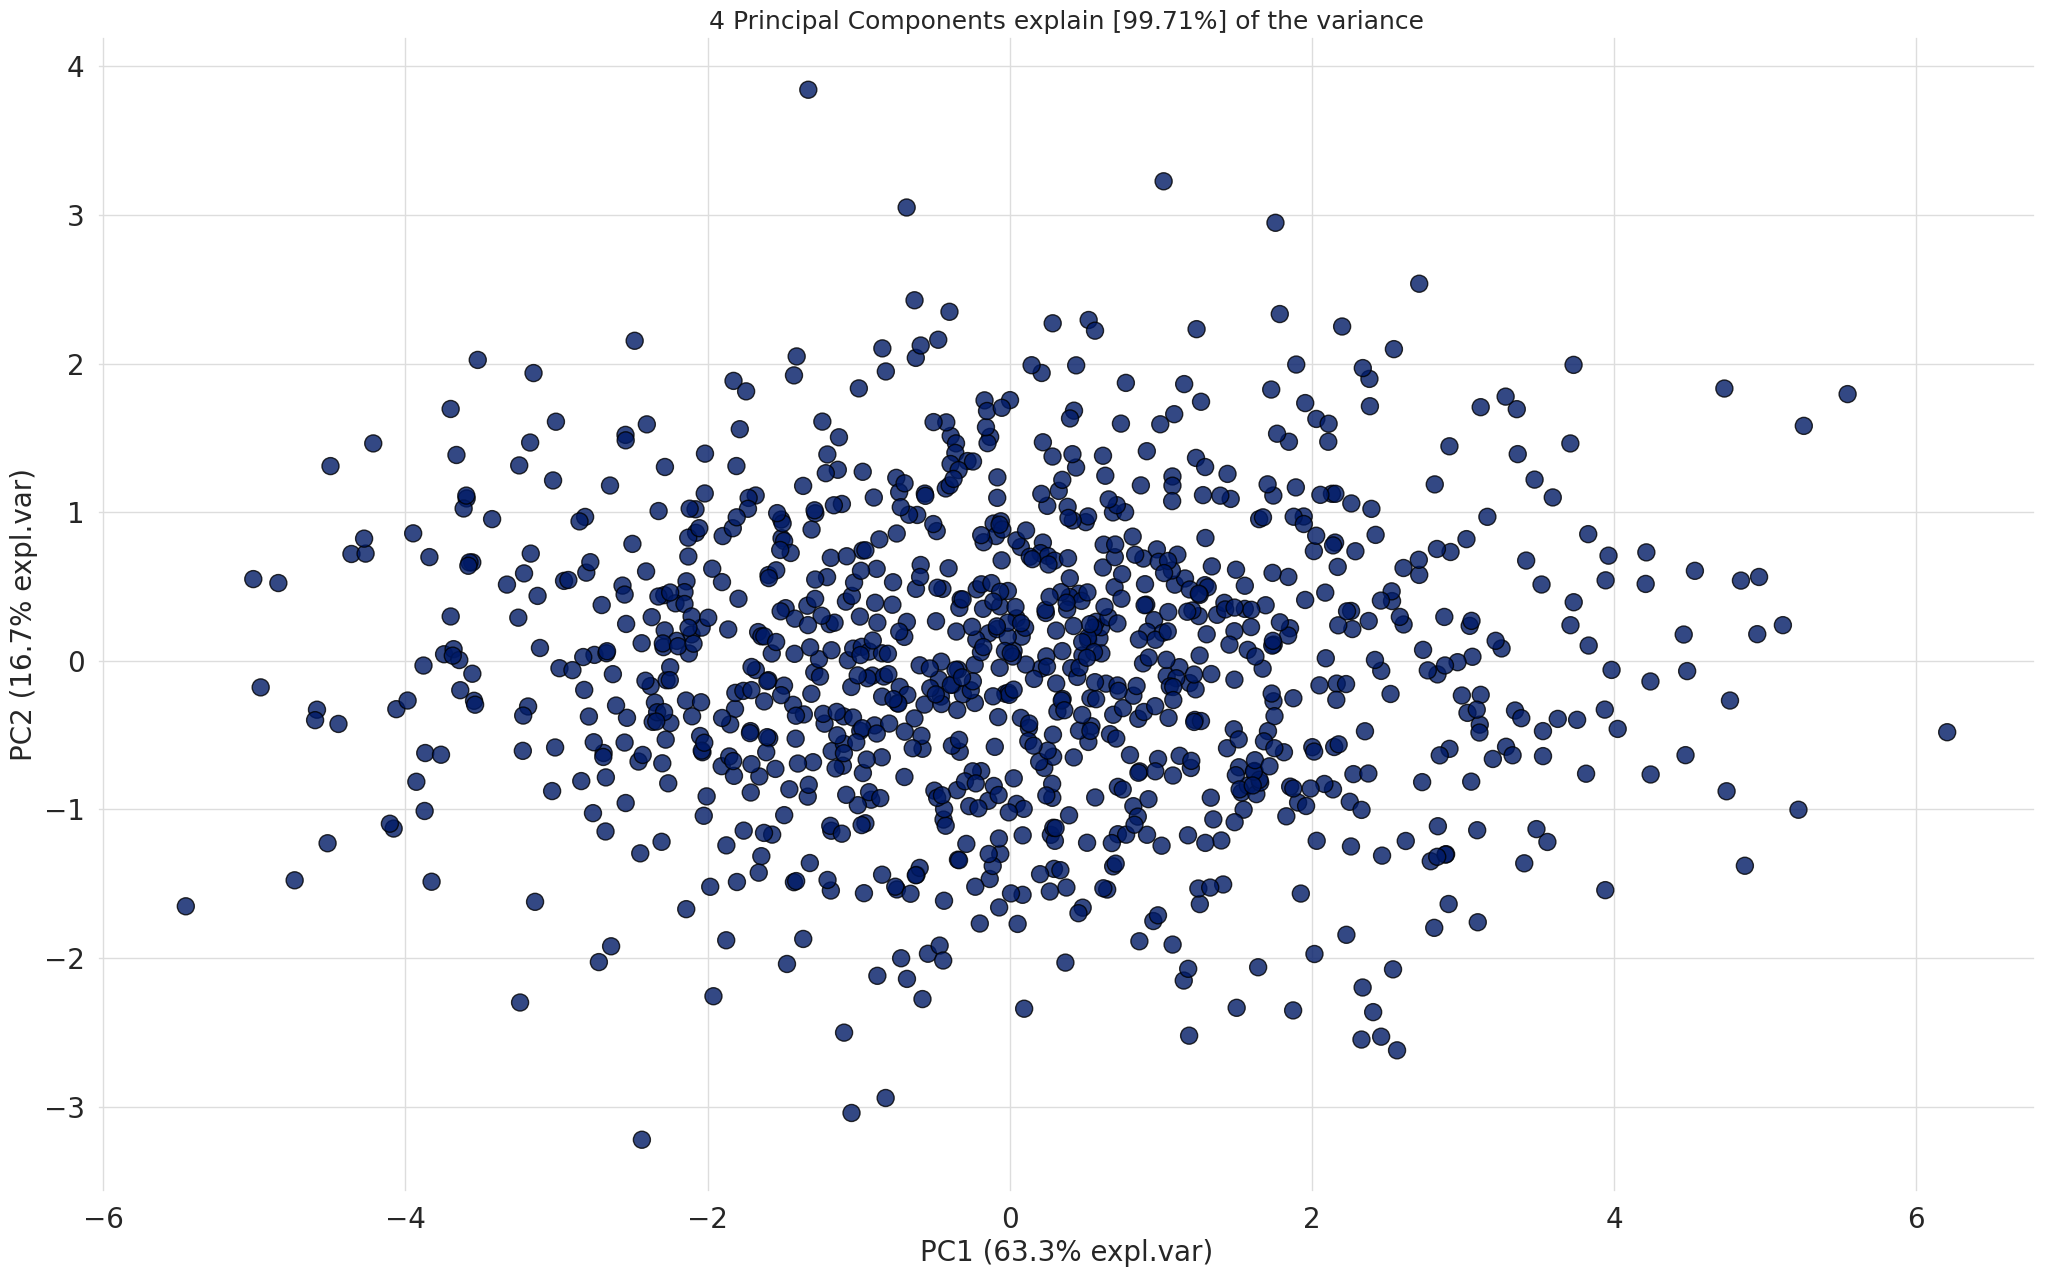

In [23]:
model.scatter(label=True, legend=False)

**Scree Plot**

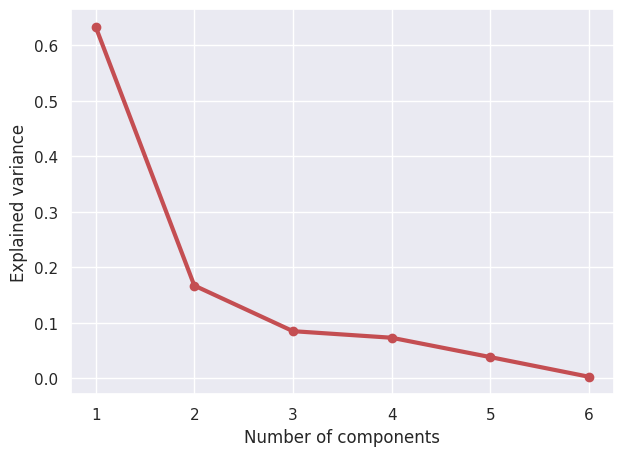

In [24]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

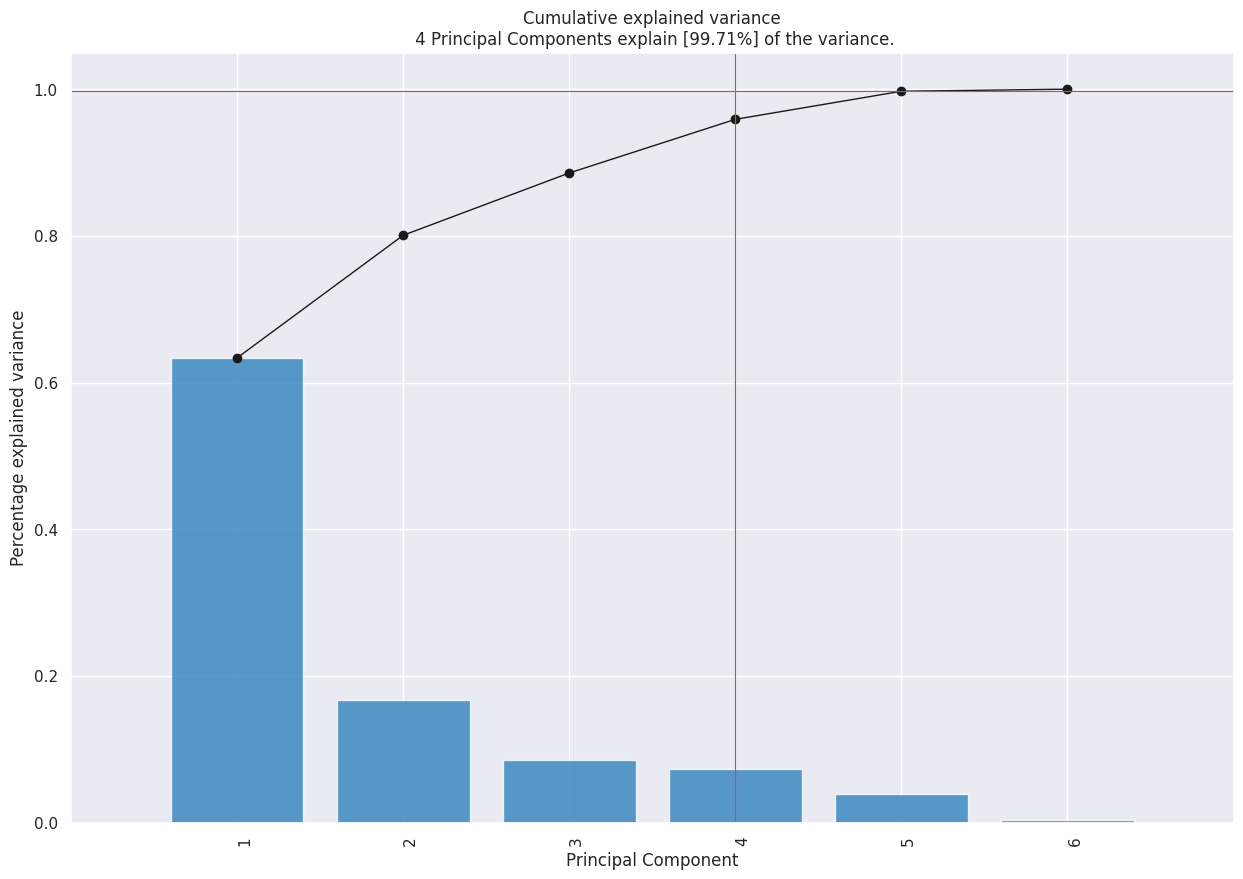

In [25]:
model.plot();

**Biplot**

A biplot is a graphical representation of multivariate data that displays both observations and variables simultaneously in a single plot. Each observation is represented as a point in a two-dimensional plot, while the variables are represented as arrows or vectors that point in the direction of the greatest variation in the data. The length of the vector indicates the magnitude of the variable, while the angle between two vectors reflects their correlation.

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [99.71%] of the variance'}, xlabel='PC1 (63.3% expl.var)', ylabel='PC2 (16.7% expl.var)'>)

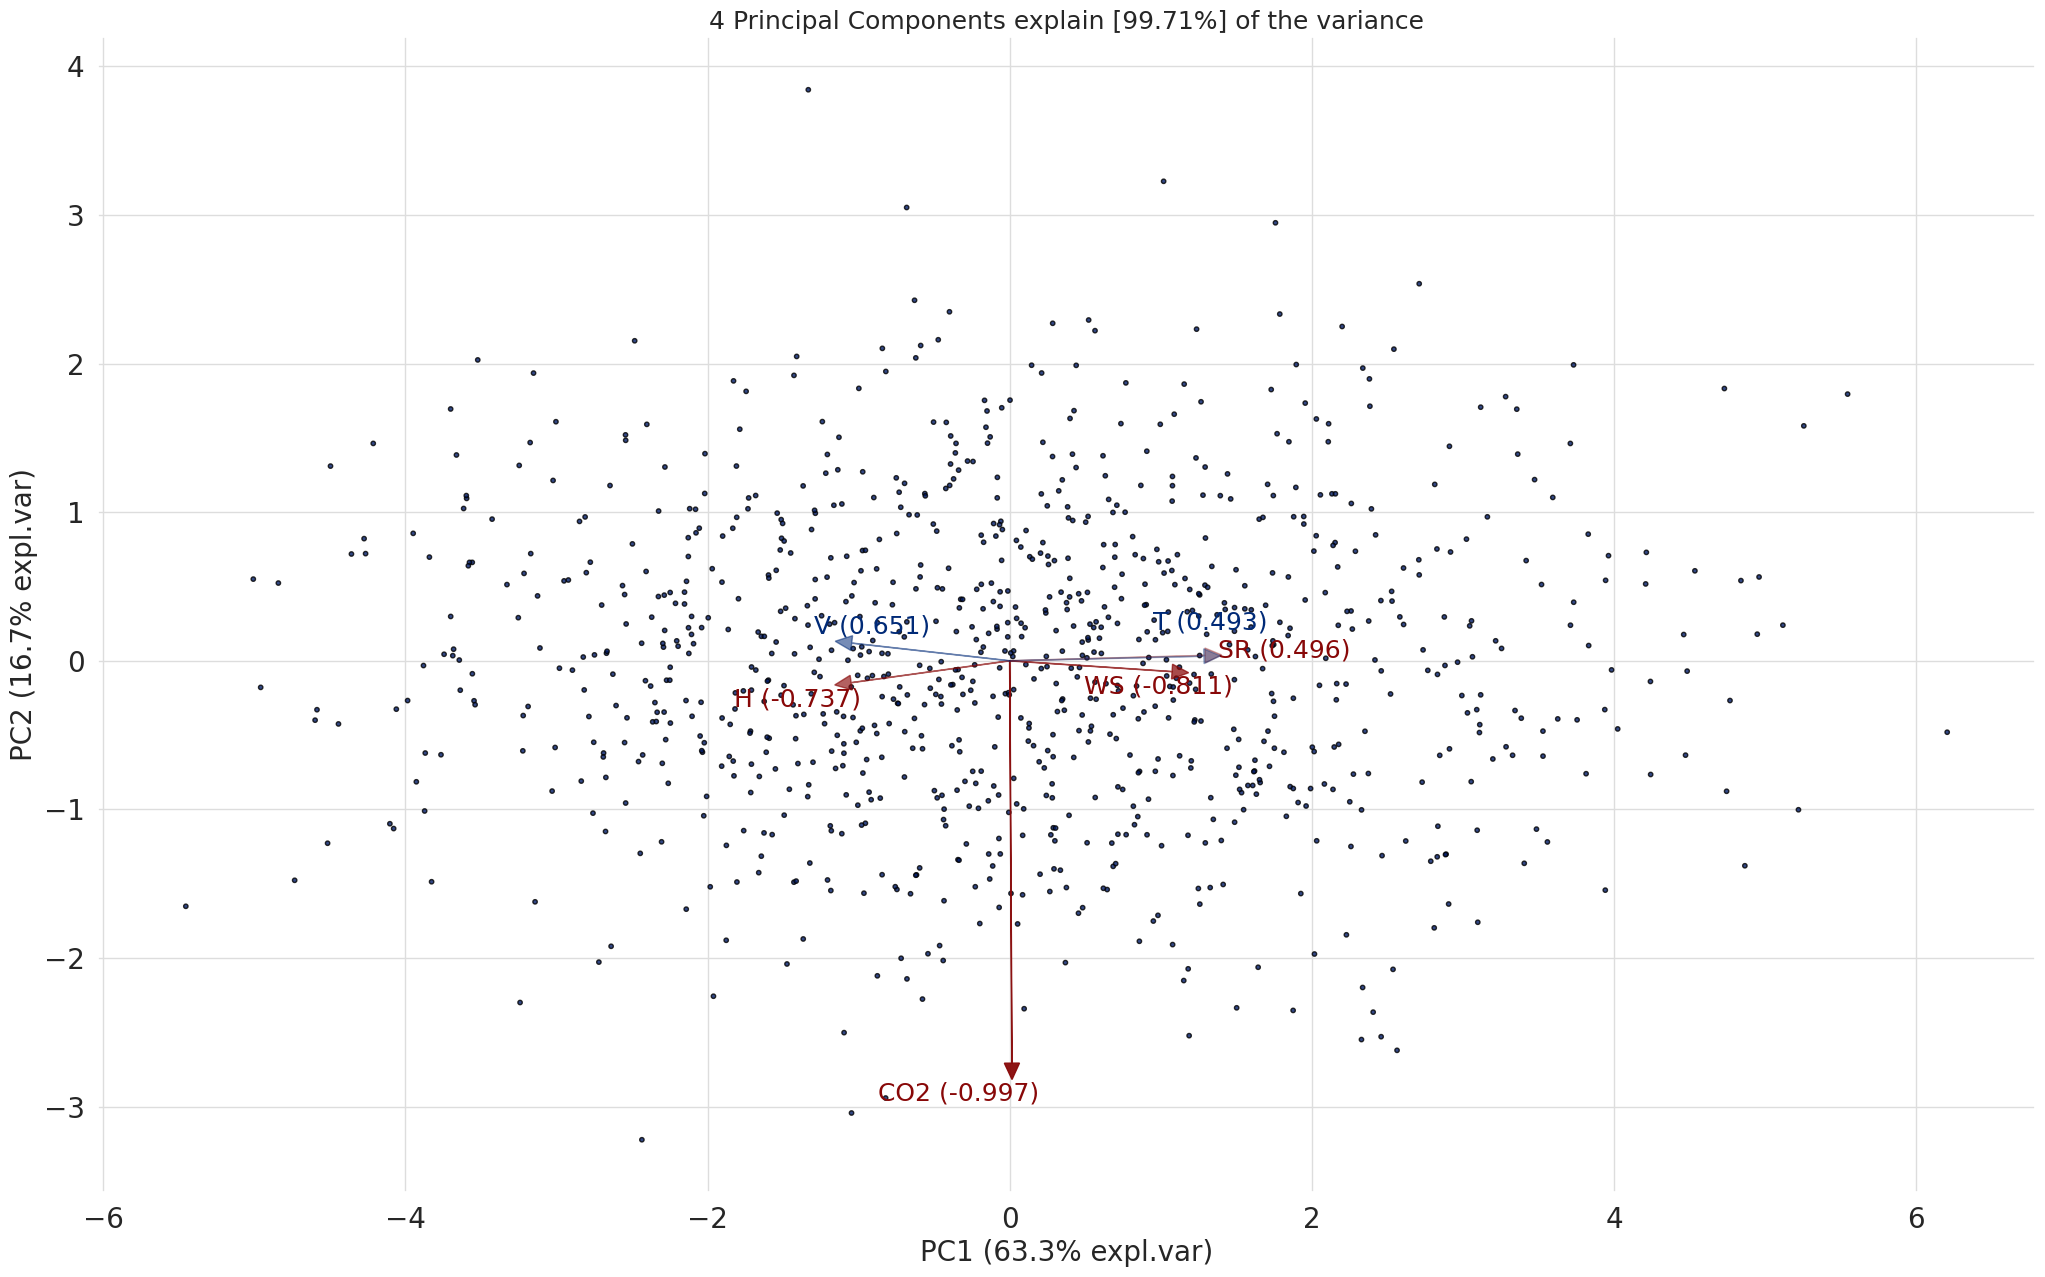

In [26]:
model.biplot(label=False, legend=False, s=10)

#**Multiclass Classification with PyCaret**


**Data Splitting**

reserving a 10% fraction of the dataset randomly for final testing

In [27]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (900, 7)
Unseen Data For Predictions: (100, 7)


**Setting up the Environment in PyCaret**

Using the 70% of the data for training

In [28]:
from pycaret.classification import *
clf = setup(data=data, target='CZ', train_size=0.8, session_id=123)

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference.

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline.

**Comparing all Machine Learning Models**

In [29]:
 #show the best model and their statistics
 best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [30]:
best_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Create Decision Tree Classifier**

In [31]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
#trained model object is stored in the variable 'dt'.
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [33]:
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [34]:
#tuned model object is stored in the variable 'tuned_dt'.
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Evaluate Decision Tree Model**

How to analyze model performance using various plots

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

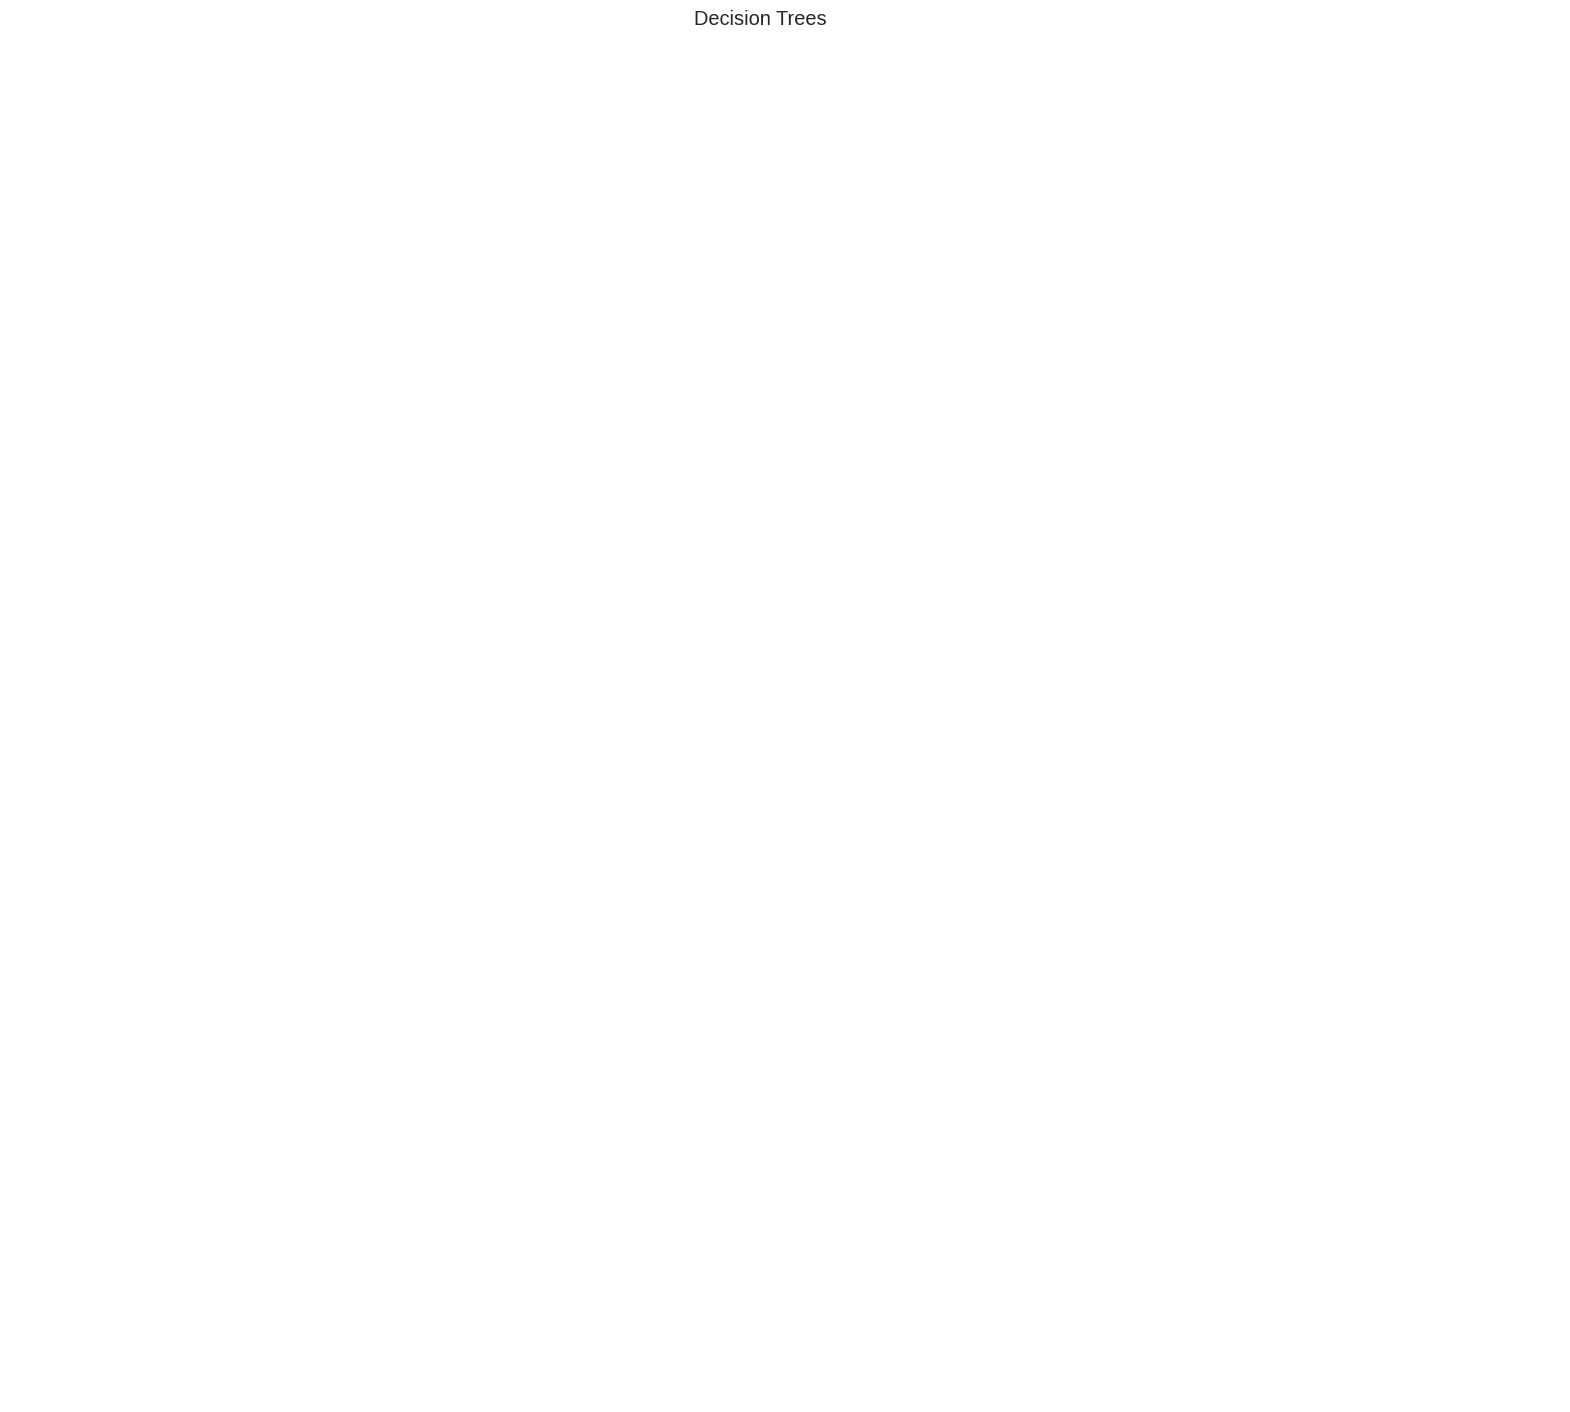

In [35]:
evaluate_model(tuned_dt)

**Create Gradient Boosting Classifier Model**

In [36]:
gbc = create_model('gbc')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune	Gradient Boosting Classifier Model**

In [37]:
tuned_gbc = tune_model(gbc)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Gradient Boosting Classifier Model**

In [38]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Tune the Best Model**

In [39]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [40]:
tuned_best_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [41]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Classification + PCA**

In [42]:
clf_pca = setup(data=df, target='CZ', train_size=0.8, session_id=123, normalize = True, pca = True, pca_components = 2)

In [43]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [44]:
best_model_pca

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Tune the Best Model**

In [45]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [46]:
tuned_best_model_pca

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='log_loss', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_samples_leaf=2,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=140, n_iter_no_change=None,
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [47]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Creating Naive Bayes Model**

In [48]:
nb = create_model('nb')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [49]:
tuned_nb = tune_model(nb)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [50]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [57]:
lightgbm_pca_pca = create_model('lightgbm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [58]:
tuned_lightgbm_pca = tune_model(lightgbm_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

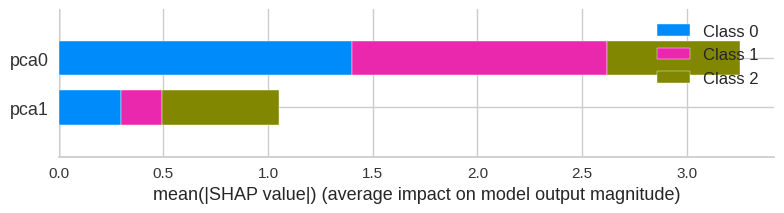

In [59]:
interpret_model(tuned_lightgbm_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [60]:
interpret_model(tuned_lightgbm_pca, plot='reason', observation=32)

From the above the plot, we can see the "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [61]:
interpret_model(tuned_lightgbm_pca, plot='reason')